In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 

import seaborn as sns 

from IPython.display import Image 
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score
from yellowbrick.classifier import DiscriminationThreshold

In [2]:
df = pd.read_csv('rookie_df.csv')

### EDA

In [3]:
df.head()

,Unnamed: 0,Year Drafted,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,...,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF,target
0,0,2013,70,34.5,16.7,6.1,15.1,40.5,0.8,3.0,...,70.3,1.4,4.8,6.2,6.3,1.9,0.6,3.5,17.6,1
1,1,2013,70,32.3,12.8,4.9,12.8,38.0,1.6,4.8,...,90.3,0.5,2.4,3.0,5.7,0.6,0.1,1.9,12.1,1
2,2,2013,80,31.1,13.8,4.9,11.7,41.9,0.9,2.8,...,78.0,0.5,3.6,4.1,4.1,1.6,0.5,3.2,13.2,1
3,3,2013,82,26.7,8.8,3.1,8.3,37.6,1.2,3.6,...,80.4,0.6,2.2,2.9,1.0,0.6,0.2,1.2,6.7,1
4,4,2013,77,24.6,6.8,2.2,5.4,41.4,0.5,1.5,...,68.3,1.0,3.4,4.4,1.9,0.8,0.8,1.6,9.1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424 entries, 0 to 1423
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1424 non-null   int64  
 1   Year Drafted  1424 non-null   int64  
 2   GP            1424 non-null   int64  
 3   MIN           1424 non-null   float64
 4   PTS           1424 non-null   float64
 5   FGM           1424 non-null   float64
 6   FGA           1424 non-null   float64
 7   FG%           1424 non-null   float64
 8   3P Made       1424 non-null   float64
 9   3PA           1424 non-null   float64
 10  3P%           1424 non-null   float64
 11  FTM           1424 non-null   float64
 12  FTA           1424 non-null   float64
 13  FT%           1424 non-null   float64
 14  OREB          1424 non-null   float64
 15  DREB          1424 non-null   float64
 16  REB           1424 non-null   float64
 17  AST           1424 non-null   float64
 18  STL           1424 non-null 

In [5]:
df['target'].value_counts()

1    856
0    568
Name: target, dtype: int64

In [6]:
df.isnull().sum()

Unnamed: 0      0
Year Drafted    0
GP              0
MIN             0
PTS             0
FGM             0
FGA             0
FG%             0
3P Made         0
3PA             0
3P%             0
FTM             0
FTA             0
FT%             0
OREB            0
DREB            0
REB             0
AST             0
STL             0
BLK             0
TOV             0
EFF             0
target          0
dtype: int64

In [7]:
df = df.dropna()
df.shape

(1424, 23)

In [8]:
df['LABEL'] = df['target'].apply(lambda x: 'Lasted for 5 Years' if x == 1 else 'Did not last for 5 years' )

In [9]:
Grouped_df = df.groupby(['LABEL']).mean().drop(['target'],axis=1)

In [10]:
Grouped_df

,Unnamed: 0,Year Drafted,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF
LABEL,,,,,,,,,,,,,,,,,,,,,
Did not last for 5 years,726.514085,1996.251761,53.790493,14.000528,4.923063,1.910915,4.339437,43.577465,0.166373,0.536796,...,1.371655,68.018486,0.873944,1.649296,2.524296,1.040493,0.451408,0.33081,0.923415,5.486268
Lasted for 5 Years,701.537383,1996.634346,66.002336,19.794159,7.937850,3.060981,6.769042,44.868107,0.285631,0.875701,...,2.121028,71.765421,1.140304,2.300935,3.440771,1.800467,0.701636,0.42722,1.363668,8.639019


In [11]:
Grouped_df = Grouped_df.T
Grouped_df

LABEL,Did not last for 5 years,Lasted for 5 Years
Unnamed: 0,726.514085,701.537383
Year Drafted,1996.251761,1996.634346
GP,53.790493,66.002336
MIN,14.000528,19.794159
PTS,4.923063,7.937850
FGM,1.910915,3.060981
FGA,4.339437,6.769042
FG%,43.577465,44.868107
3P Made,0.166373,0.285631
3PA,0.536796,0.875701


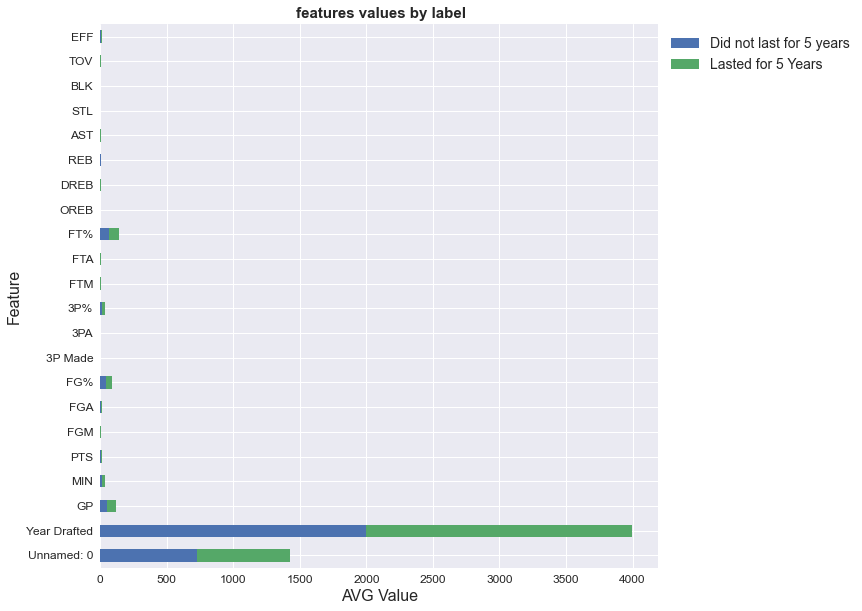

In [12]:
plt.style.use('seaborn')
ax = Grouped_df.plot(stacked = True, kind= 'barh', figsize=(10,10))

plt.legend(bbox_to_anchor=(1, 1), loc='upper left',fontsize=14)
plt.xlabel('AVG Value',fontsize=16)
plt.ylabel('Feature',fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title(' features values by label',fontsize=15,weight='bold');

In [13]:
X = df.drop(['Unnamed: 0','target','LABEL'], axis=1)
y = df['target']

In [14]:
X.corr()

,Year Drafted,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF
Year Drafted,1.000000,-0.131692,0.001058,-0.086733,-0.116427,-0.079652,-0.136767,0.347501,0.352602,0.242375,...,-0.141504,0.090923,-0.122378,0.003465,-0.044666,-0.081629,-0.098525,-0.044503,-0.179152,-0.077572
GP,-0.131692,1.000000,0.616953,0.546825,0.548465,0.526646,0.287151,0.147552,0.145556,0.075119,...,0.478958,0.194209,0.398580,0.480485,0.467211,0.368997,0.466951,0.279178,0.514329,0.587754
MIN,0.001058,0.616953,1.000000,0.912241,0.904418,0.909564,0.218896,0.376451,0.391687,0.153649,...,0.786574,0.224205,0.581778,0.746446,0.712038,0.621459,0.749358,0.402372,0.831197,0.919360
PTS,-0.086733,0.546825,0.912241,1.000000,0.991004,0.979798,0.258354,0.350964,0.364142,0.155691,...,0.882213,0.251951,0.570365,0.688916,0.670066,0.549174,0.675042,0.369685,0.852544,0.918183
FGM,-0.116427,0.548465,0.904418,0.991004,1.000000,0.980419,0.291925,0.293704,0.307220,0.123022,...,0.844285,0.215627,0.591429,0.697721,0.683818,0.529818,0.663217,0.381845,0.837325,0.916193
FGA,-0.079652,0.526646,0.909564,0.979798,0.980419,1.000000,0.133558,0.390767,0.416726,0.196198,...,0.808708,0.261457,0.500348,0.633550,0.606970,0.588603,0.690498,0.307485,0.848098,0.866277
FG%,-0.136767,0.287151,0.218896,0.258354,0.291925,0.133558,1.000000,-0.271359,-0.324035,-0.305997,...,0.305817,-0.168100,0.501439,0.417729,0.465524,-0.111677,0.067817,0.382284,0.128768,0.409815
3P Made,0.347501,0.147552,0.376451,0.350964,0.293704,0.390767,-0.271359,1.000000,0.984239,0.568721,...,0.090869,0.338466,-0.223534,0.000568,-0.084456,0.381273,0.303313,-0.177219,0.253993,0.193161
3PA,0.352602,0.145556,0.391687,0.364142,0.307220,0.416726,-0.324035,0.984239,1.000000,0.564264,...,0.105726,0.345238,-0.234178,-0.003879,-0.091371,0.417310,0.336437,-0.189887,0.281141,0.195245
3P%,0.242375,0.075119,0.153649,0.155691,0.123022,0.196198,-0.305997,0.568721,0.564264,1.000000,...,-0.018801,0.342024,-0.285030,-0.132174,-0.195413,0.267731,0.192196,-0.249444,0.115011,0.023993


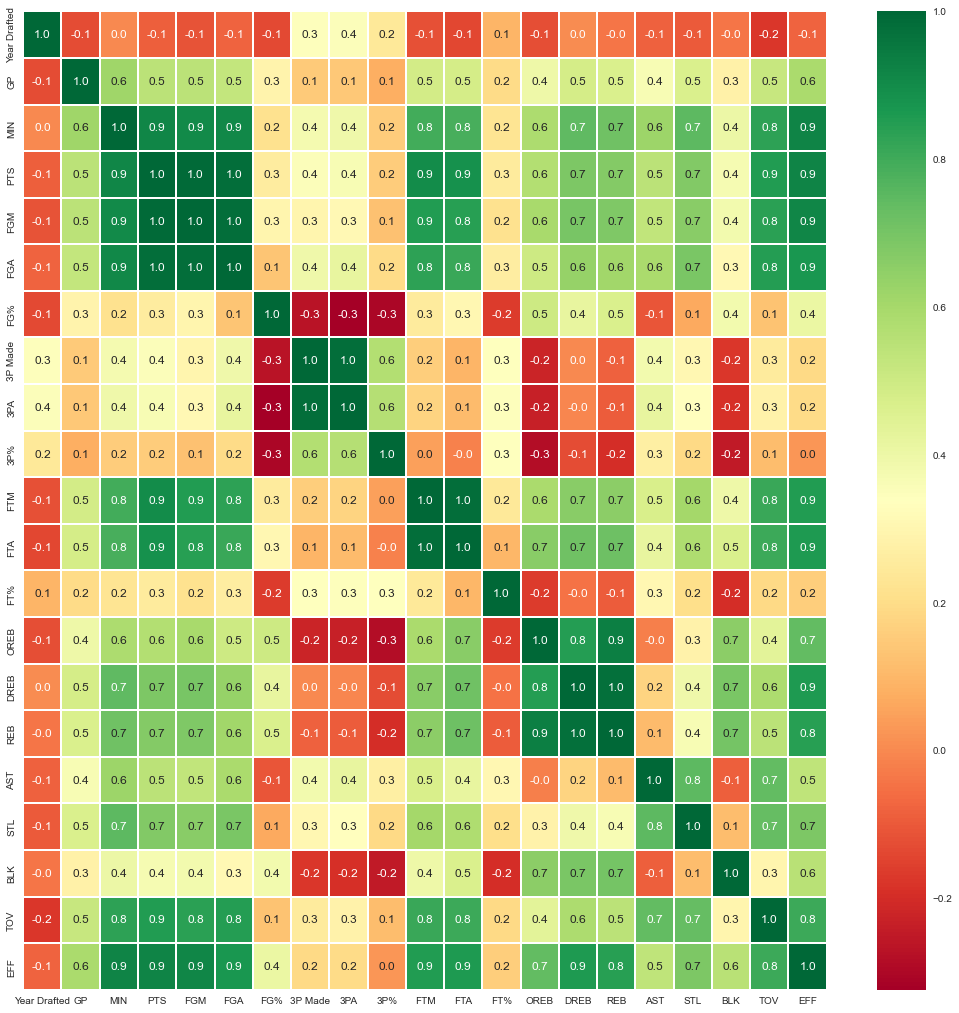

In [15]:
fig, ax = plt.subplots(figsize=(18,18))
sns.heatmap(X.corr(),annot = True, linewidth = 2, fmt = '.1f',cmap='RdYlGn');

In [16]:
def exclude_feature(dataset, threshold=0.9):
    
    corr_matrix = dataset.corr()
    m = corr_matrix.shape[0]
    dependent_feature_limit = 1
    
    excluded_features = set()
    
    for i in range(m):
        counter = 0
        for j in range(m):
            if abs(corr_matrix.iloc[i,j]) >= threshold :
                counter += 1
        if counter > dependent_feature_limit :
            excluded_features.add(corr_matrix.index[i])
    
    
    return excluded_features

In [17]:
excluded_features = exclude_feature(X,0.9)
excluded_features

{'3P Made',
 '3PA',
 'DREB',
 'EFF',
 'FGA',
 'FGM',
 'FTA',
 'FTM',
 'MIN',
 'OREB',
 'PTS',
 'REB'}

In [18]:
X = X.drop(excluded_features, axis=1)
X

,Year Drafted,GP,FG%,3P%,FT%,AST,STL,BLK,TOV
0,2013,70,40.5,26.4,70.3,6.3,1.9,0.6,3.5
1,2013,70,38.0,33.0,90.3,5.7,0.6,0.1,1.9
2,2013,80,41.9,32.7,78.0,4.1,1.6,0.5,3.2
3,2013,82,37.6,32.0,80.4,1.0,0.6,0.2,1.2
4,2013,77,41.4,34.7,68.3,1.9,0.8,0.8,1.6
...,...,...,...,...,...,...,...,...,...
1419,1980,59,45.4,0.0,56.4,1.2,0.6,0.1,1.3
1420,1980,47,35.8,0.0,78.1,1.5,0.5,0.0,0.6
1421,1980,60,33.0,0.0,73.9,1.3,0.4,0.0,0.6
1422,1980,55,41.2,0.0,43.5,0.3,0.4,0.4,0.6


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [20]:
clf = LogisticRegression(multi_class='auto',solver="liblinear")

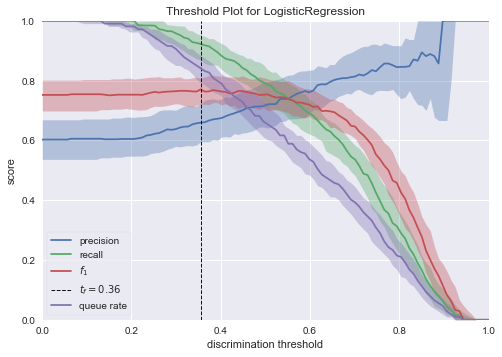

In [21]:
viz = DiscriminationThreshold(clf)
viz.fit(X_train,y_train)
viz.show();

In [22]:
clf.fit(X_train,y_train);

In [23]:
y_pred = np.where(clf.predict_proba(X_test)[:,1]>0.39,1,0)
y_pred

array([1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [24]:
f1_score(y_test,y_pred)

0.7662082514734775

In [25]:
confusion_matrix(y_test,y_pred)

array([[ 42, 100],
       [ 19, 195]], dtype=int64)

In [30]:
tn,fp,fn,tp = confusion_matrix(y_test,y_pred).ravel()
print(f'True Negative: {tn}')
print(f'False Negative: {fn}')
print(f'True Positive: {tp}')
print(f'False Positive: {fp}')

True Negative: 42
False Negative: 19
True Positive: 195
False Positive: 100


In [31]:
accuracy_score(y_test, y_pred)

0.6657303370786517

In [32]:
precision_score(y_test, y_pred)

0.6610169491525424

In [33]:
recall_score(y_test, y_pred)

0.9112149532710281